In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths
import numpy as np

from openpathsampling.analysis.tis_analysis import TISTransition
from openpathsampling.analysis.tis_analysis import sampleset_sample_generator

storage = paths.storage.Storage("toy_retis.nc", mode="r")

In [2]:
print len(storage.samplesets)

1000


In [3]:
retis = storage.transitions.load(0)

In [4]:
%%time
# retis.move_summary()

CPU times: user 5 µs, sys: 6 µs, total: 11 µs
Wall time: 10 µs


In [5]:
%%time
# retis.move_summary('shooting')

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


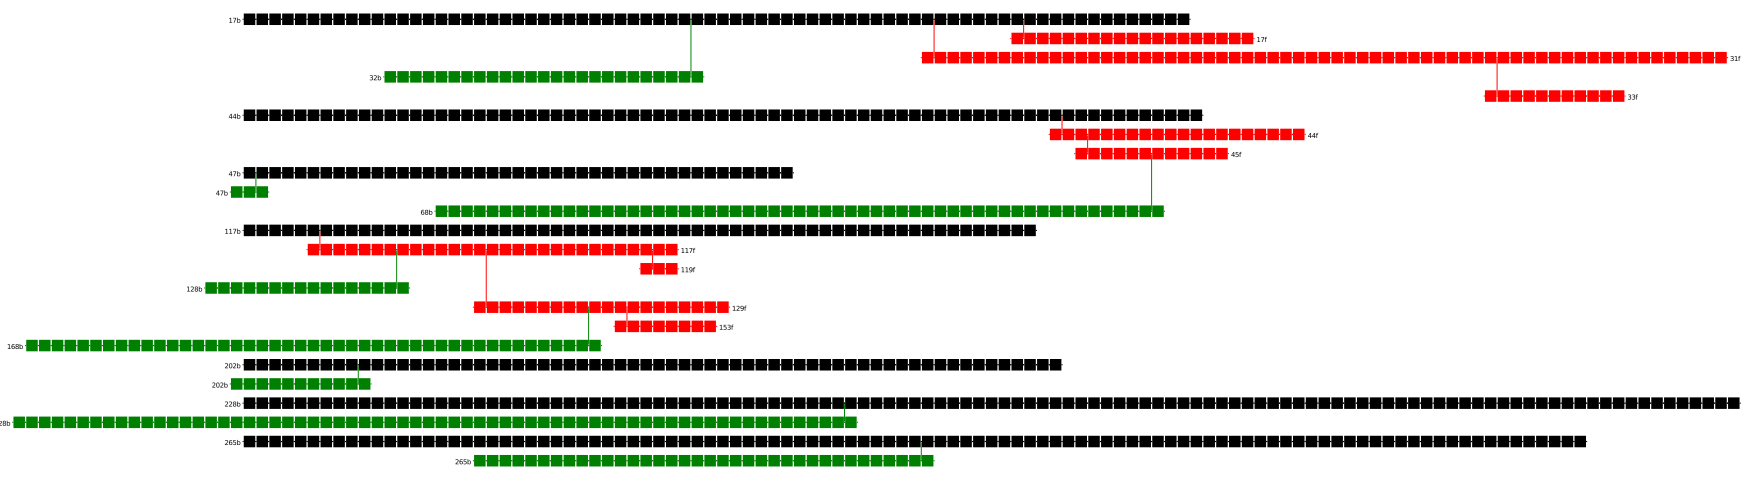

In [6]:
from openpathsampling.visualize import PathTreeBuilder
from IPython.display import SVG

sample_iter = sampleset_sample_generator(storage)
first40 = []
old=None
for s in sample_iter:
    if s.replica == 3:
        if s != old:
            first40.append(s)
        old = s
    if len(first40) == 40:
        break

tree = PathTreeBuilder(storage)        
tree.rejected = True
tree.from_samples(first40)
view = tree.renderer
view.zoom = 0.8
view.scale_y = 24
view.scale_x = 16
view.font_size = 0.35
SVG(view.to_svg())

In [39]:
# TODO count decorrelated paths

In [40]:
retis.ensemble_histogram_info['pathlength'].hist_args = { 'bin_width' : 5, 'bin_range' : (0, 150) }
retis.ensemble_histogram_info['max_lambda'].hist_args = { 'bin_width' : 0.02, 'bin_range' : (-0.35, 0.35) }

In [41]:
%%time
retis.all_statistics(storage=storage, weights=None, force=True)

CPU times: user 1min 46s, sys: 15.1 s, total: 2min 1s
Wall time: 2min 21s


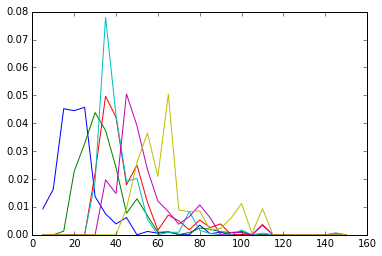

In [42]:
for ens in retis.ensembles:
    myhist = retis.histograms['pathlength'][ens]
    plt.plot(myhist.plot_bins(), myhist.normalized())

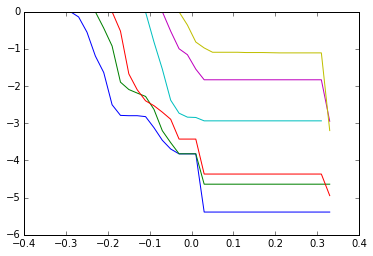

In [43]:
for ens in retis.ensembles:
    myhist = retis.histograms['max_lambda'][ens]
    plt.plot(myhist.plot_bins(), 
             np.log(myhist.reverse_cumulative())
            )

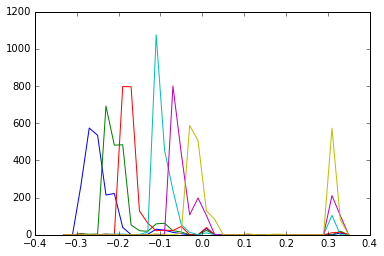

In [44]:
for ens in retis.ensembles:
    myhist = retis.histograms['max_lambda'][ens]
    plt.plot(myhist.plot_bins(), myhist())

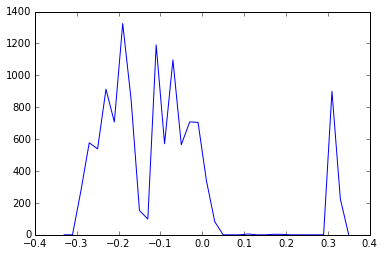

In [45]:
# TODO: add a histogram.sum_hist() function to add several histograms together
from operator import add
total_sampling = np.zeros(len(retis.histograms['max_lambda'][retis.ensembles[0]]()))
for ens in retis.ensembles:
    total_sampling = map(add, total_sampling, retis.histograms['max_lambda'][ens]())
plt.plot(myhist.plot_bins(), total_sampling);

In [46]:
from toy_plot_helpers import ToyPlot
plot = ToyPlot()
plot.add_pes(storage.engines.load(0).pes)

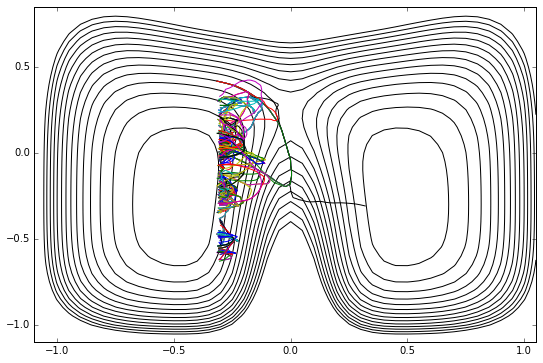

In [47]:
ens0_traj = [s.trajectory for s in storage.samples if s.ensemble == retis.ensembles[0]]
plt.contour(plot.X, plot.Y, plot._pes, levels=np.arange(0.0, 1.5, 0.1), colors='k')
for mytraj in ens0_traj[slice(None,None,1)]:
    plt.plot(mytraj.coordinates()[:,0,0], mytraj.coordinates()[:,0,1])

In [48]:
wham = retis.total_crossing_probability(method="wham")

ValueError: math domain error

In [16]:
plt.plot(wham.keys(), wham.values());

NameError: name 'wham' is not defined

In [17]:
plt.plot(wham.keys(), np.log(wham.values()));

NameError: name 'wham' is not defined

In [18]:
%%time
#retis.rate(storage=storage)
# TODO: conditional_transition_probability, minus_flux, rate
retis.conditional_transition_probability(storage, retis.ensembles[-1])

CPU times: user 1.52 s, sys: 106 ms, total: 1.62 s
Wall time: 1.62 s


0.626

In [19]:
#print retis.flux, retis.tcp(0.0), retis.ctp[retis.ensembles[-1]]

In [61]:
flux_outside_ensemble = paths.AllOutXEnsemble(retis.minus_ensemble.innermost_vol)
flux_inside_ensemble = paths.AllInXEnsemble(retis.minus_ensemble.innermost_vol)
flux_partial_ensemble = paths.SequentialEnsemble([
        flux_outside_ensemble,
        flux_inside_ensemble
    ])
minus_count = 0
minus = retis.movers['minus'][0]
for delta in storage.pathmovechanges:
    if minus in delta:
        part_traj = flux_partial_ensemble.split(delta.samples)
        minus_count += 1
            
print minus_count


RuntimeError: NetCDF: HDF error

In [56]:
retis.minus_ensemble.innermost_vol

In [4]:
delta = storage.pathmovechanges[10]

In [22]:
for m in retis.movers['shooting']:
    if m in delta:
        d_mover = m
        print d_mover

In [4]:
%%time
retis.move_acceptance(storage)

CPU times: user 39.5 s, sys: 4.37 s, total: 43.9 s
Wall time: 44.5 s


In [8]:
retis._mover_acceptance

{'{<openpathsampling.pathmover.BackwardShootMover object at 0x10d01b350>: []}': [68,
  82],
 '{<openpathsampling.pathmover.BackwardShootMover object at 0x10d01b610>: []}': [46,
  73],
 '{<openpathsampling.pathmover.BackwardShootMover object at 0x10d01b850>: []}': [55,
  72],
 '{<openpathsampling.pathmover.BackwardShootMover object at 0x10d0712d0>: []}': [72,
  104],
 '{<openpathsampling.pathmover.BackwardShootMover object at 0x10d071610>: []}': [61,
  75],
 '{<openpathsampling.pathmover.BackwardShootMover object at 0x10d071e90>: []}': [59,
  97],
 '{<openpathsampling.pathmover.ForwardShootMover object at 0x10d0540d0>: []}': [62,
  80],
 '{<openpathsampling.pathmover.ForwardShootMover object at 0x10d054bd0>: []}': [68,
  76],
 '{<openpathsampling.pathmover.ForwardShootMover object at 0x10d054c10>: []}': [54,
  71],
 '{<openpathsampling.pathmover.ForwardShootMover object at 0x10d054c50>: []}': [65,
  80],
 '{<openpathsampling.pathmover.ForwardShootMover object at 0x10d054c90>: []}': [60,

In [24]:
delta.movetree()

{<openpathsampling.pathmover.PathSimulatorMover at 0x1180d5ad0>: [{<openpathsampling.pathmover.RandomChoiceMover at 0x1183a2e90>: [{<openpathsampling.pathmover.RandomChoiceMover at 0x1180df310>: [{<openpathsampling.pathmover.OneWayShootingMover at 0x1180d5710>: [{<openpathsampling.pathmover.ForwardShootMover at 0x1180dfe50>: []}]}]}]}]}

In [20]:
delta.subchanges[0].subchanges[0]

In [ ]:
delta.m